In [7]:
import os

from python_speech_features import mfcc
from python_speech_features import delta
from python_speech_features import logfbank
import scipy.io.wavfile as wav
from random import randint

import tensorflow as tf
import numpy as numpy
import librosa
import librosa.display
from matplotlib import pyplot as plt

In [8]:
def get_feature_vectors(dataset_type):
    
    #set parameters for training and testing
    if (dataset_type == "train"):
        directory = os.path.join(os.getcwd(), 'data_thuyg20_sre/enroll')
        no_of_frames = 400
    elif (dataset_type == "test"):    
        directory = os.path.join(os.getcwd(), 'data_thuyg20_sre/test')
        no_of_frames = 40
    
    dataset = numpy.empty([0, 40])
    
    for file in os.listdir(directory):
        
        # filter speakers
        names = ['F101', 'F102', 'F103', 'F104', 'F105', 'M101', 'M102', 'M103', 'M104']

        if any(name in file for name in names):
            
            # extract mfcc vectors
            
            (rate,sig) = wav.read(os.path.join(directory, file))
            mfcc_feat = mfcc(sig,rate)
            d_mfcc_feat = delta(mfcc_feat, 2)
            dd_mfcc_feat = delta(d_mfcc_feat, 2)
            
            #fbank_feat = logfbank(sig,rate)
            mfcc_vectors = mfcc_feat[11:11+no_of_frames,:]
            dmfcc_vectors = d_mfcc_feat[11:11+no_of_frames,:]
            ddmfcc_vectors = dd_mfcc_feat[11:11+no_of_frames,:]
            
            feature_vectors = numpy.hstack((mfcc_vectors, dmfcc_vectors, ddmfcc_vectors))
            #print(feature_vectors.shape)
            
            # get speaker index from filename
            speaker_index = file.split("_")[0]
            if speaker_index[0] == 'M':
                speaker_index = 5 + int(speaker_index[3:])
            else:
                speaker_index = int(speaker_index[3:])

            #append speaker index to feature vectors
            np_speaker_index = numpy.array([speaker_index])
            temp = numpy.tile(np_speaker_index[numpy.newaxis,:], (feature_vectors.shape[0],1))
            concatenated_feature_vector = numpy.concatenate((feature_vectors,temp), axis=1)
            
            #print(dataset.shape)
            #print(concatenated_feature_vector.shape)
            # append file's data to dataset
            dataset = numpy.concatenate((dataset, concatenated_feature_vector), axis=0)
            
            

    return dataset

In [9]:
def get_feature_vectors_librosa(dataset_type):
    
    #set parameters for training and testing
    if (dataset_type == "train"):
        directory = os.path.join(os.getcwd(), 'data_thuyg20_sre/enroll')
        no_of_frames = 400
    elif (dataset_type == "test"):    
        directory = os.path.join(os.getcwd(), 'data_thuyg20_sre/test')
        no_of_frames = 40
    
    dataset = numpy.empty([0, 40])
    
    X = []
    Y = []
    
    for file in os.listdir(directory):
        
        # filter speakers
        #names = ['F101', 'F102', 'F103', 'F104', 'F105', 'M101', 'M102', 'M103', 'M104']
        names = ['F101']
        
        if any(name in file for name in names):
            
            # extract mfcc vectors
            y, sr = librosa.load(os.path.join(directory, file))
            mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
            delta = librosa.feature.delta(mfcc)
            delta2 = librosa.feature.delta(mfcc, order=2)
            X.append(numpy.c_[mfcc,delta,delta2])
            Y.append(file.split("_")[0])
            
            plt.figure(figsize=(12, 6))

            plt.subplot(3,1,1)
            librosa.display.specshow(mfcc)
            plt.ylabel('MFCC')
            plt.colorbar()

#             plt.subplot(3,1,2)
#             librosa.display.specshow(delta)
#             plt.ylabel('MFCC-$\Delta$')
#             plt.colorbar()

#             plt.subplot(3,1,3)
#             librosa.display.specshow(delta2, sr=sr, x_axis='time')
#             plt.ylabel('MFCC-$\Delta^2$')
#             plt.colorbar()

            plt.tight_layout()

            
#             (rate,sig) = wav.read(os.path.join(directory, file))
#             mfcc_feat = mfcc(sig,rate)
#             d_mfcc_feat = delta(mfcc_feat, 2)
#             dd_mfcc_feat = delta(d_mfcc_feat, 2)
            
            #fbank_feat = logfbank(sig,rate)
#             mfcc_vectors = mfcc_feat[11:11+no_of_frames,:]
#             dmfcc_vectors = d_mfcc_feat[11:11+no_of_frames,:]
#             ddmfcc_vectors = dd_mfcc_feat[11:11+no_of_frames,:]
            
#             feature_vectors = numpy.hstack((mfcc_vectors, dmfcc_vectors, ddmfcc_vectors))
#             #print(feature_vectors.shape)
            
#             # get speaker index from filename
#             speaker_index = file.split("_")[0]
#             if speaker_index[0] == 'M':
#                 speaker_index = 5 + int(speaker_index[3:])
#             else:
#                 speaker_index = int(speaker_index[3:])

#             #append speaker index to feature vectors
#             np_speaker_index = numpy.array([speaker_index])
#             temp = numpy.tile(np_speaker_index[numpy.newaxis,:], (feature_vectors.shape[0],1))
#             concatenated_feature_vector = numpy.concatenate((feature_vectors,temp), axis=1)
            
#             #print(dataset.shape)
#             #print(concatenated_feature_vector.shape)
#             # append file's data to dataset
#             dataset = numpy.concatenate((dataset, concatenated_feature_vector), axis=0)
            
    return X, Y

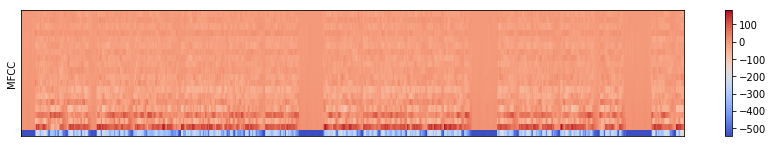

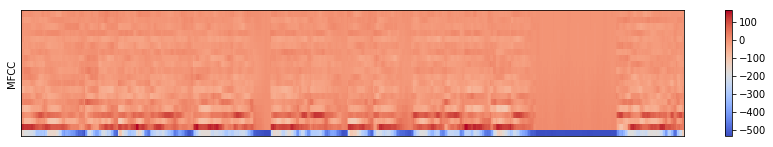

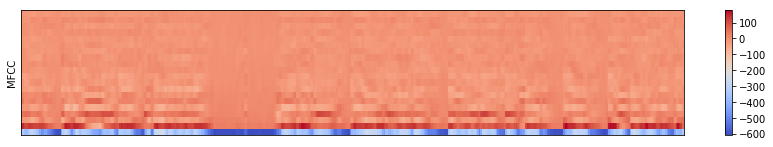

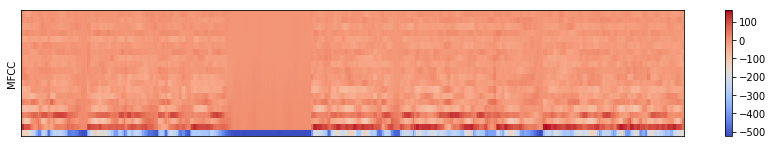

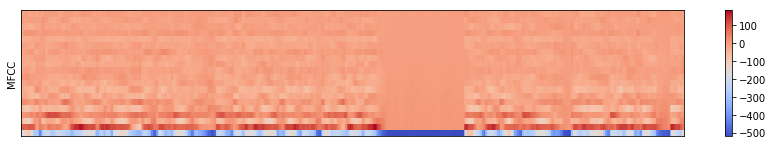

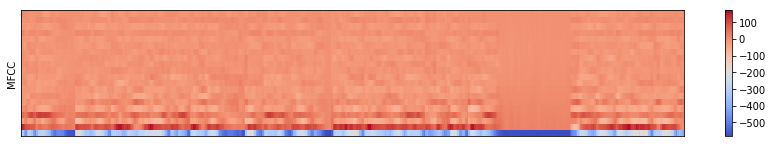

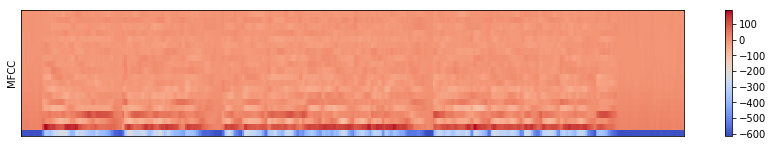

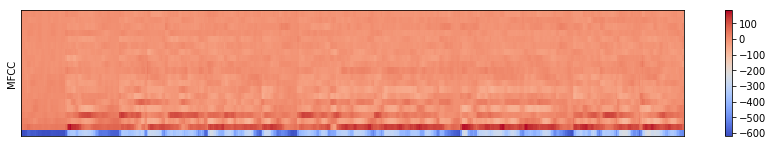

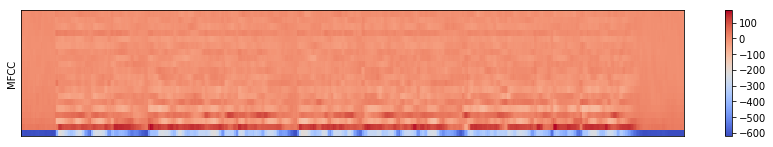

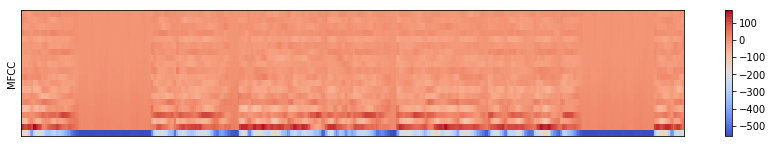

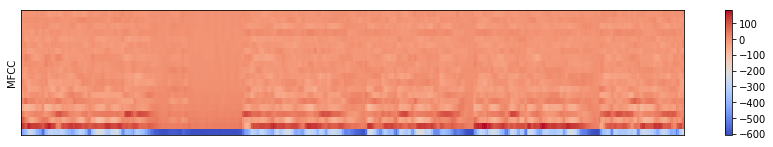

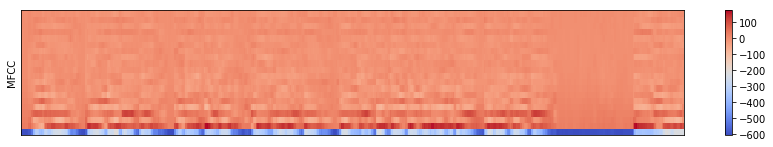

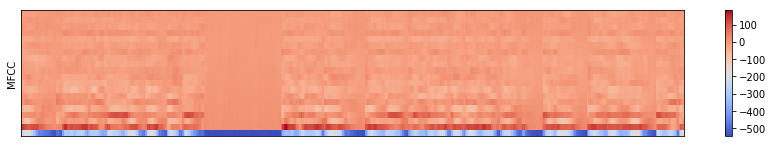

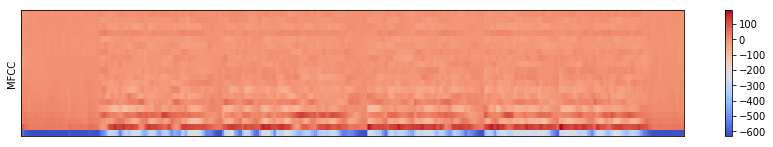

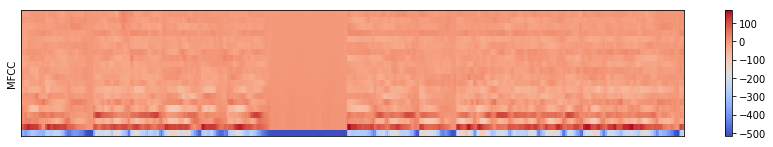

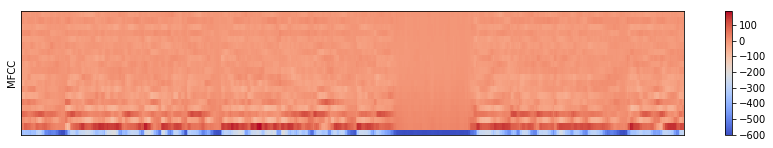

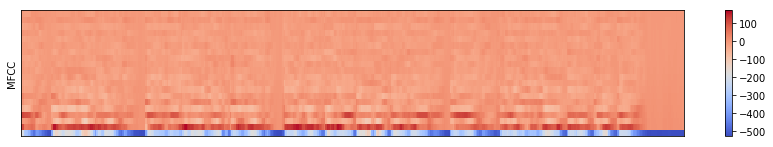

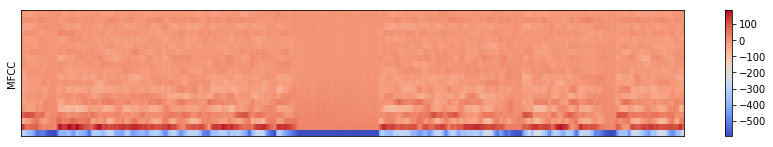

In [10]:
# from numpy import genfromtxt
X, Y = get_feature_vectors_librosa("train")

Xtest, Ytest = get_feature_vectors_librosa("test")

In [48]:
x_train = numpy.array(X)
y_train = numpy.array(Y)
x_val = numpy.array(Xtest)
y_val = numpy.array(Ytest)
x_train.shape
y_train.shape

print(x_train[0][0][0])

-543.3643924009407


In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution1D, MaxPooling1D
from keras.utils import np_utils



In [40]:
model = Sequential()

model.add(Dense(units=128, activation='tanh', input_shape=(20,3876,)))
model.add(Dense(units=128, activation='tanh'))
model.add(Dense(units=128, activation='tanh'))
model.add(Dropout(rate=0.5))
model.add(Flatten())
model.add(Dense(units=9, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=0, verbose=1, mode='max')
csv_logger = keras.callbacks.CSVLogger('training.log')

model.fit(x_train, y_train, epochs=10, validation_split=0.1, callbacks=[csv_logger]) 

ValueError: Error when checking target: expected dense_16 to have shape (9,) but got array with shape (1,)

In [27]:
print(model.test_on_batch(test_X, test_labels, sample_weight=None))
print(model.metrics_names)
predictions = model.predict(test_X)

b = [sum(predictions[current: current+40]) for current in range(0, len(predictions), 40)]
predicted_Y = []
for row in b:
    predicted_Y.append(row.argmax(axis=0))
    
# print(predicted_Y)
# print(test_Y[::40].T)

#for t, p in zip(test_Y[::40].T[0], predicted_Y):
#    print (int(t), p)

diff = predicted_Y - test_Y[::40].T[0]

numerator = sum(x == 0 for x in diff)
denominator = len(predicted_Y)

print("{} of {}".format(numerator, denominator))

print("Accuracy: {}".format(numerator/denominator))

[1.8617187, 0.45666668]
['loss', 'acc']
57 of 90
Accuracy: 0.6333333333333333
